In [1]:
import pandas as pd
import numpy as np
import os
import wrangle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Is logerror different based on bahrooms?
- Is logerror different based on pools?
- Is logerror different based on roomcount?
- Does logerror differ across garage_sqft, if we control for fips?
- Is logerror different based on threequarterbathnbr?

In [2]:
df, train, validate, test = wrangle.wrangle_zillow()

local file not found
retrieving data from sql server
SUMMARY REPORT


Dataframe head: 
        id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    NaN                       NaN   
1  1387261  17052889                    NaN                       NaN   
2    11677  14186244                    NaN                       NaN   

   basementsqft  bathrooms  bedrooms  buildingclasstypeid  \
0           NaN        3.5       4.0                  NaN   
1           NaN        1.0       2.0                  NaN   
2           NaN        2.0       3.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    NaN                3.5  ...         6.059063e+13   
1                    NaN                1.0  ...         6.111001e+13   
2                    NaN                2.0  ...         6.059022e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0  0.

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,bathrooms,bedrooms,buildingqualitytypeid,calculatedbathnbr,area,finishedsquarefeet12,fips,...,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,NaN,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,None,None,Single Family Residential
1,1387261,17052889,NaN,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,None,None,Single Family Residential
2,11677,14186244,NaN,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,None,None,Single Family Residential
3,2288172,12177905,NaN,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,None,Central,Single Family Residential
6,781532,12095076,1.0,3.0,4.0,9.0,3.0,2962.0,2962.0,6037.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Central,Single Family Residential


In [4]:
train.shape

(29370, 44)

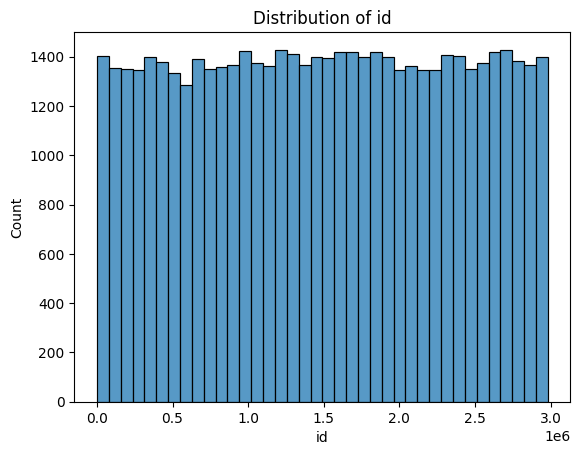

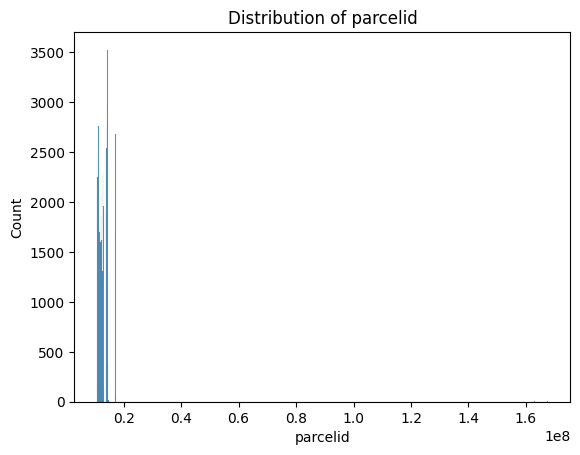

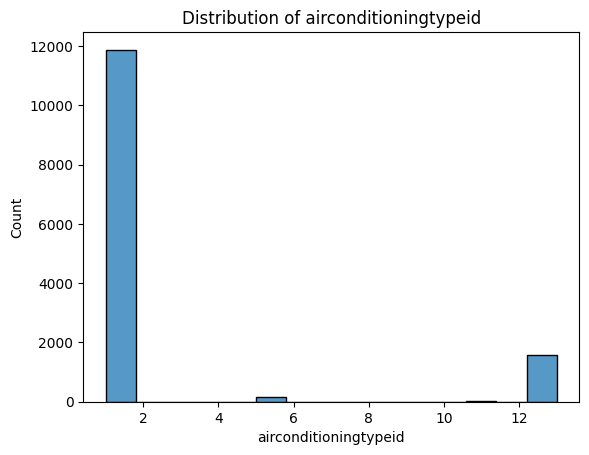

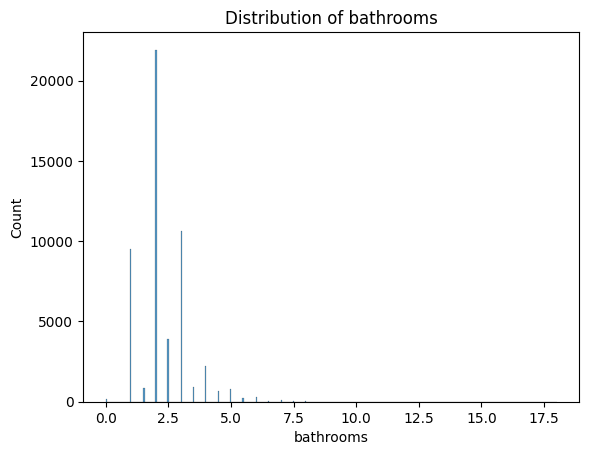

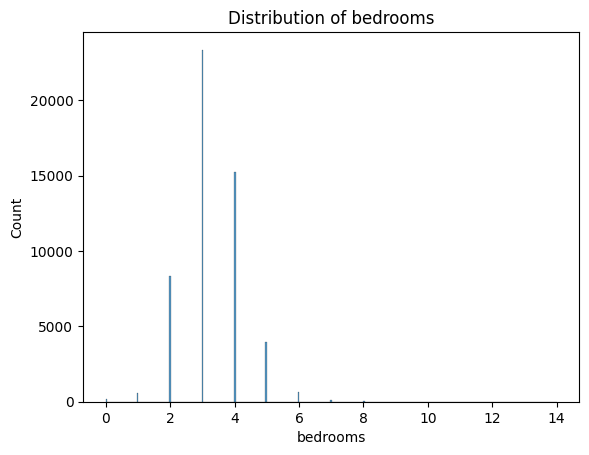

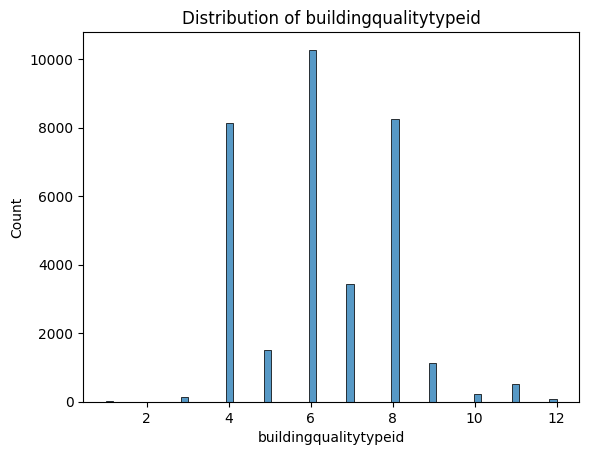

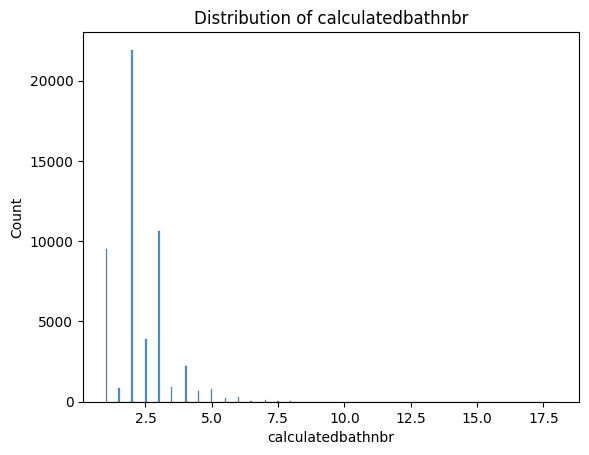

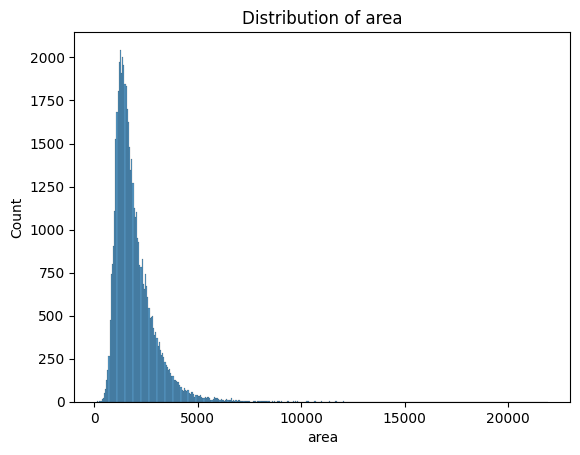

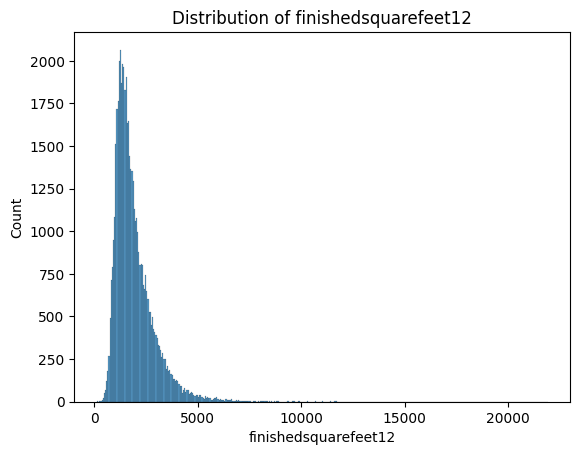

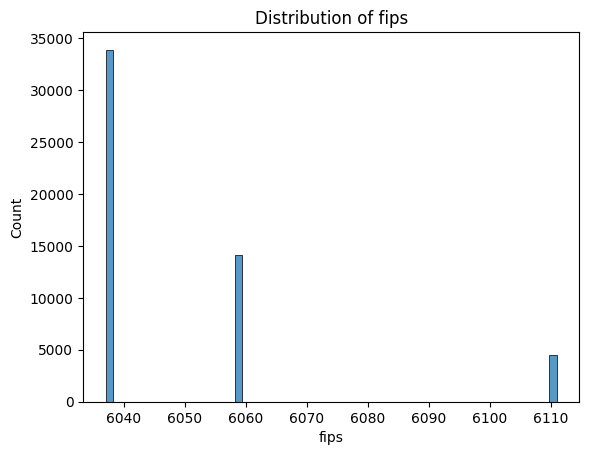

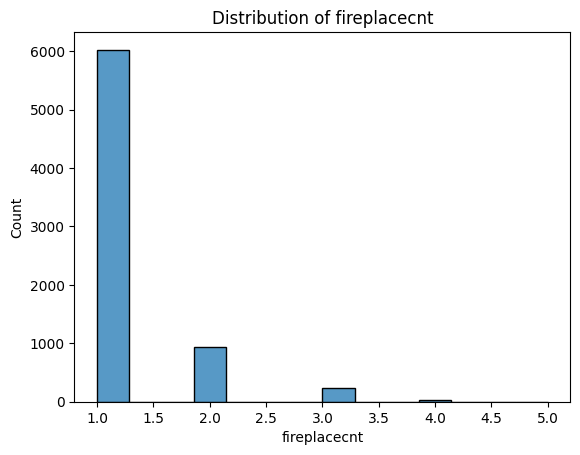

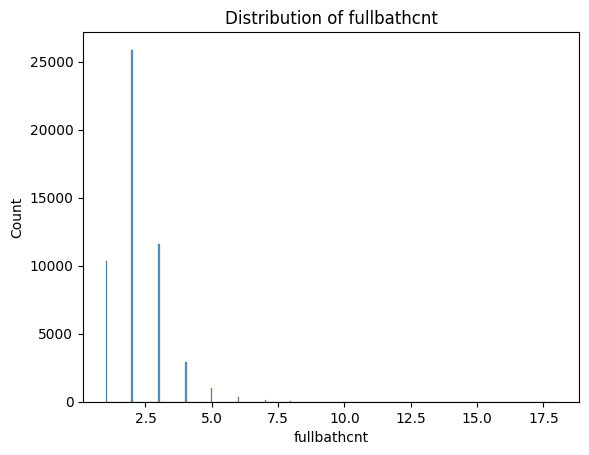

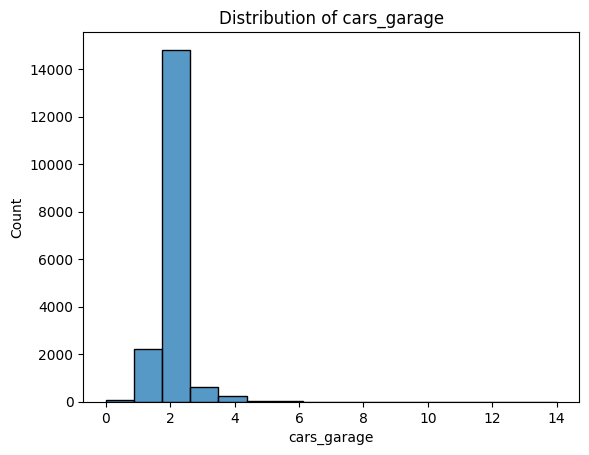

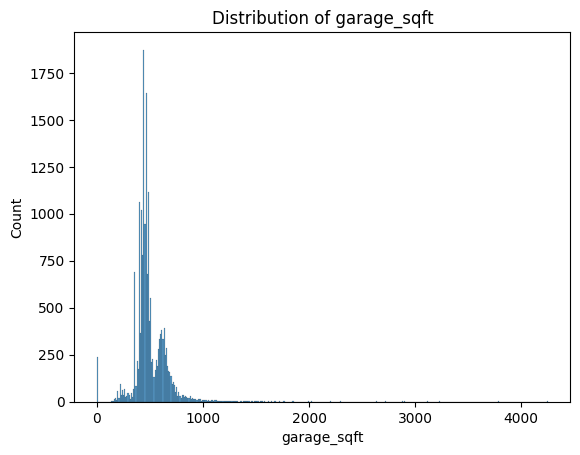

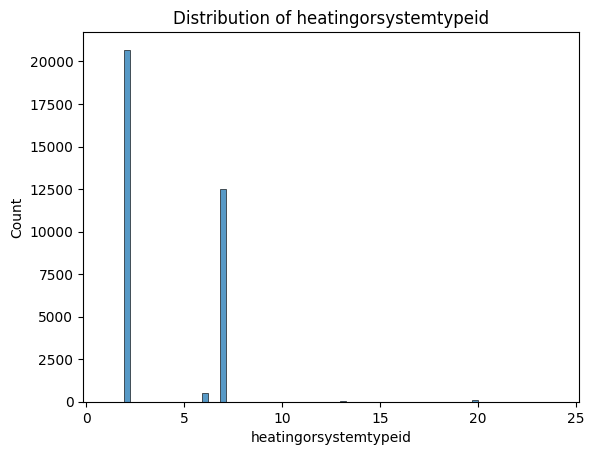

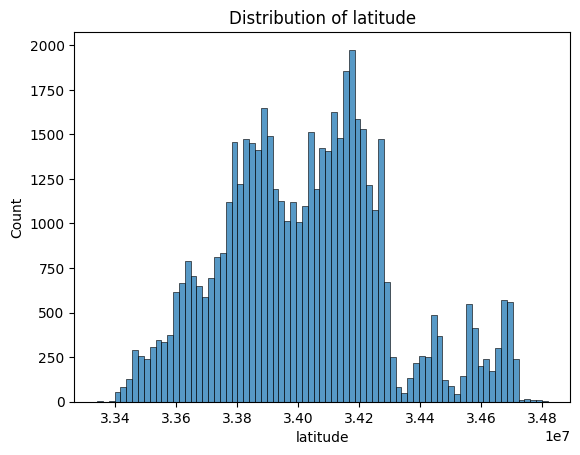

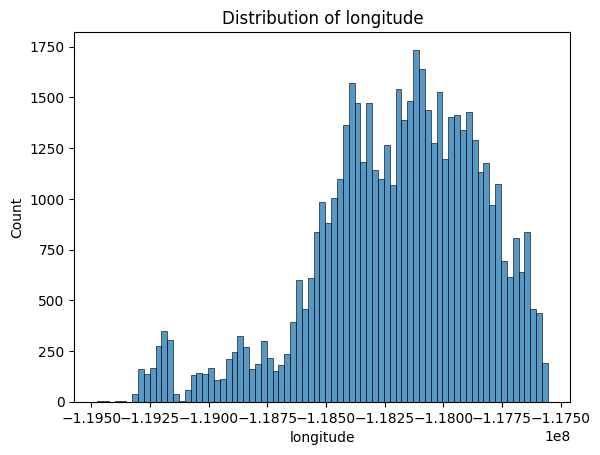

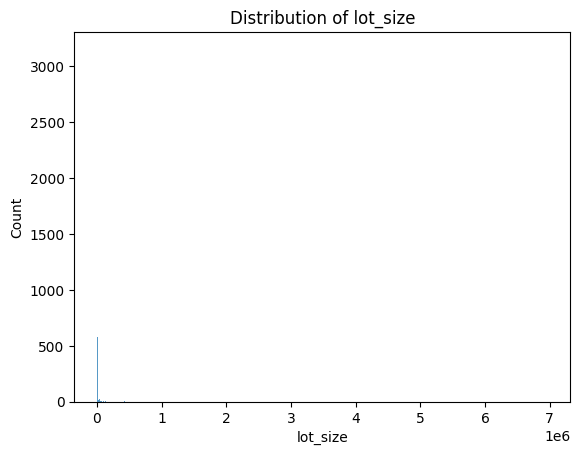

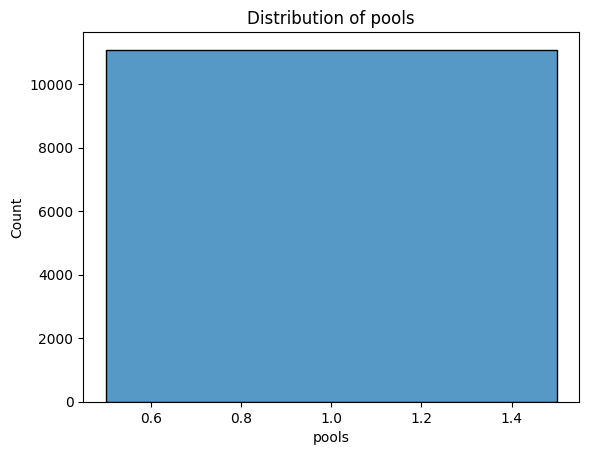

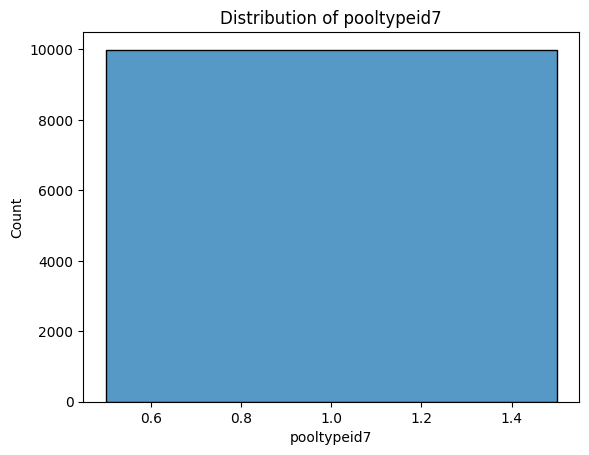

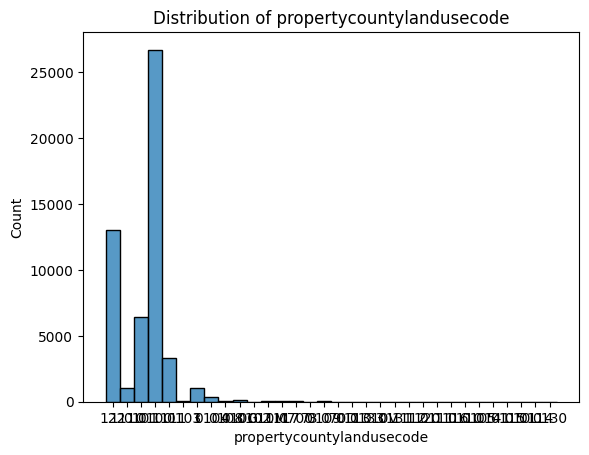

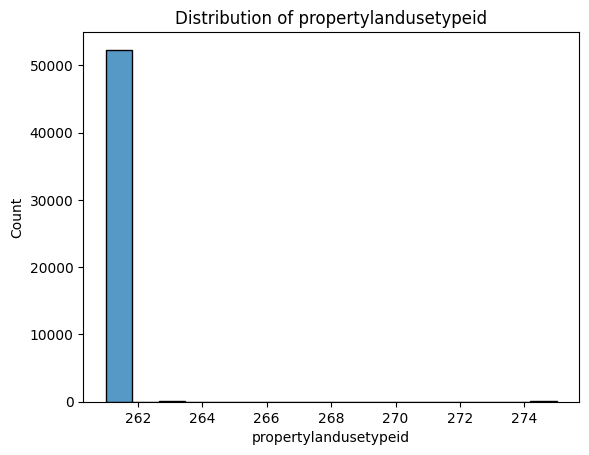

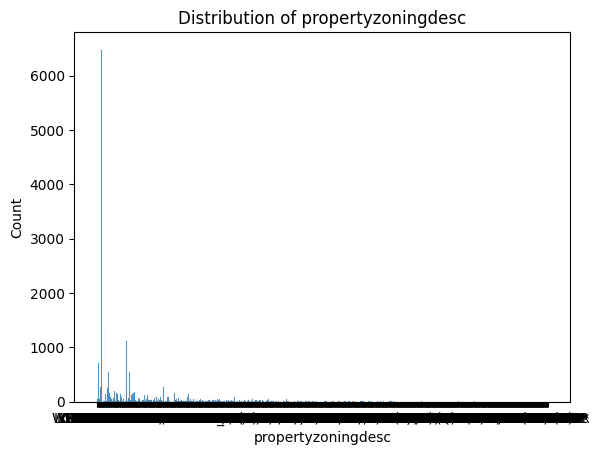

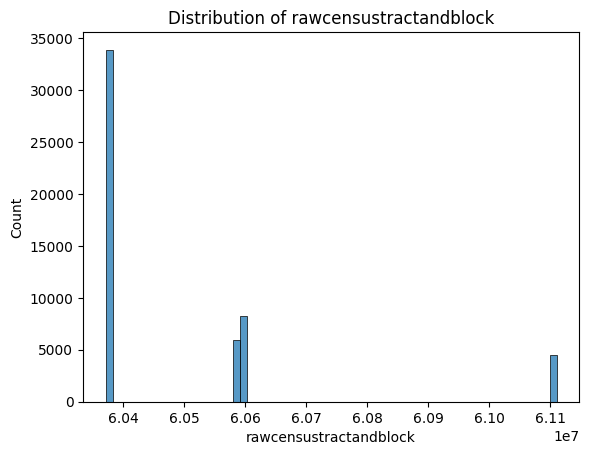

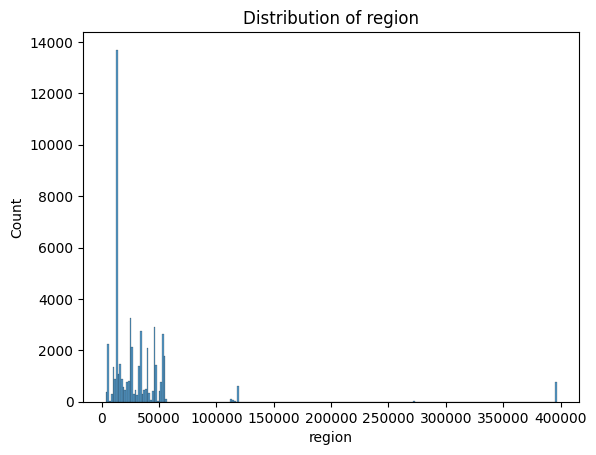

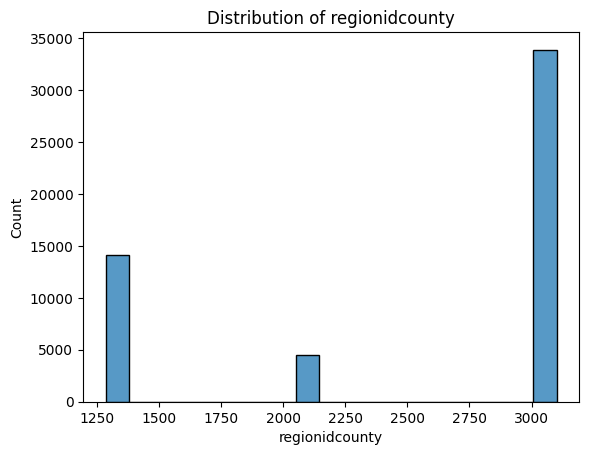

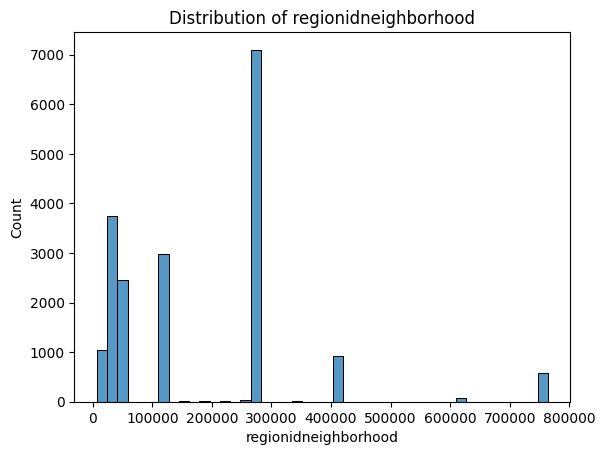

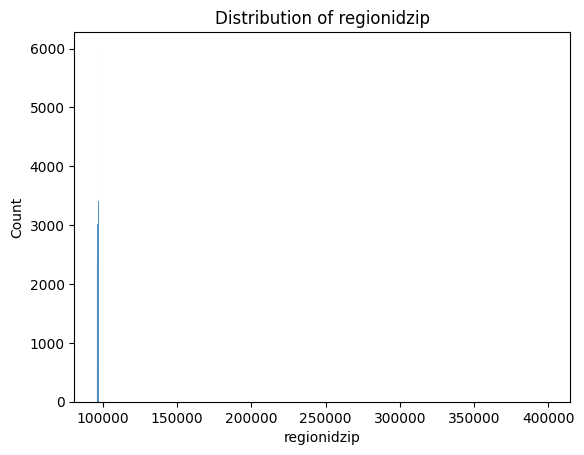

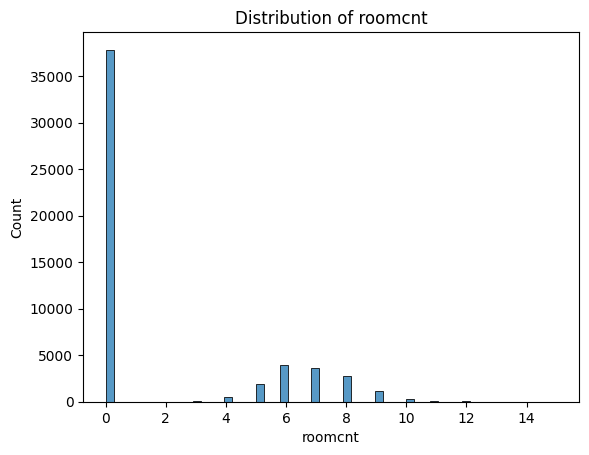

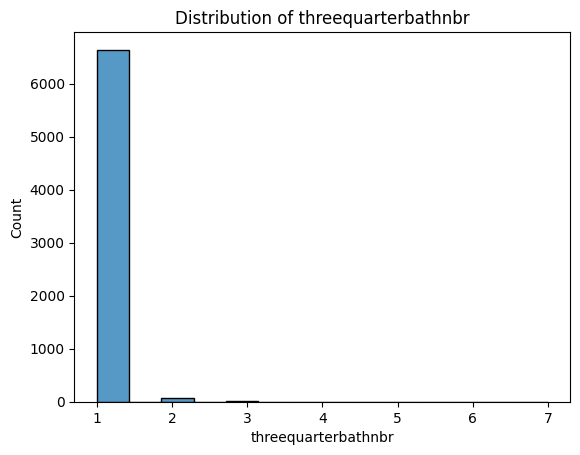

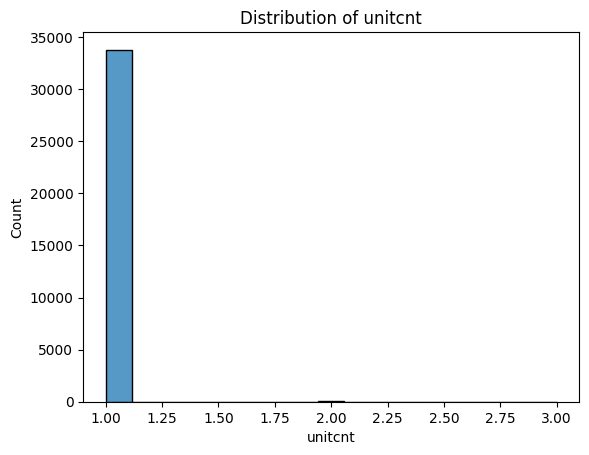

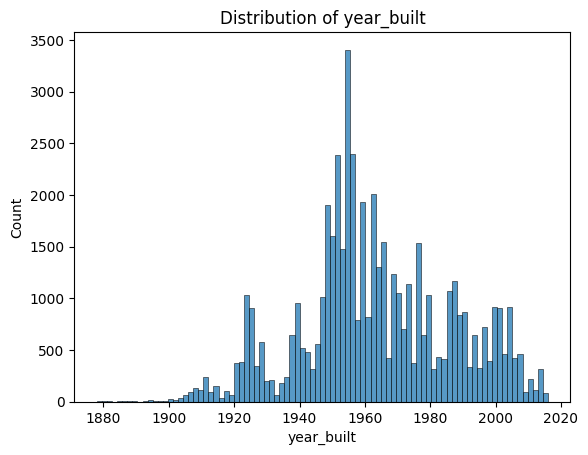

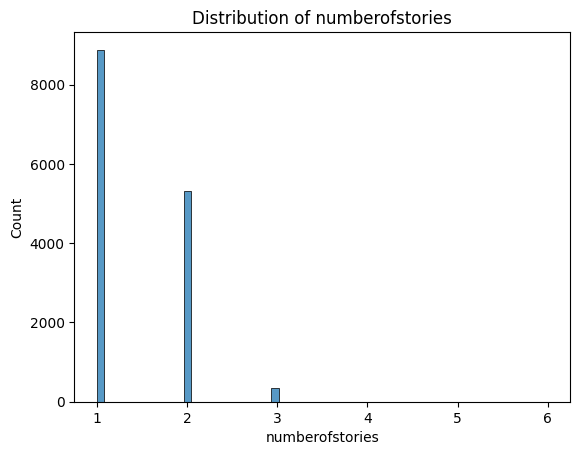

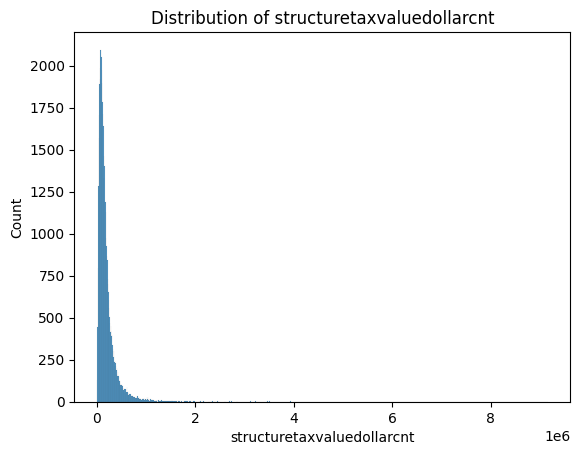

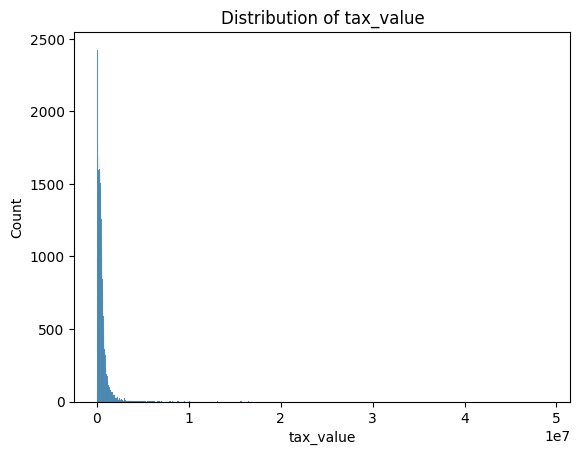

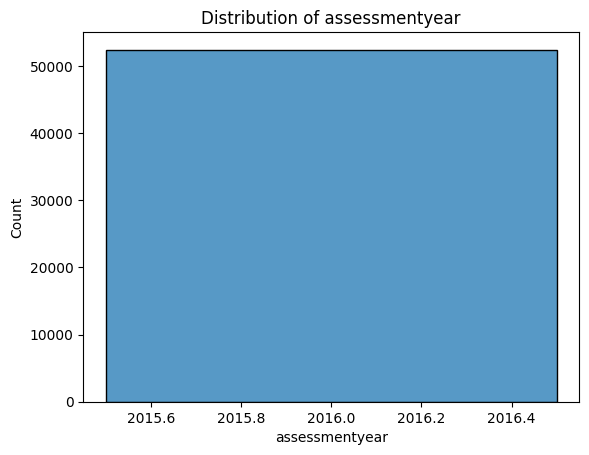

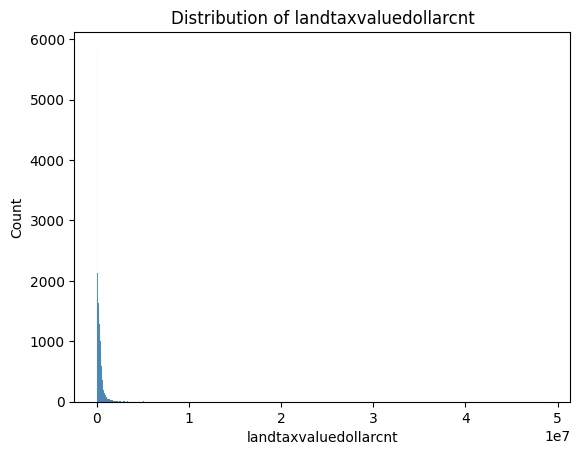

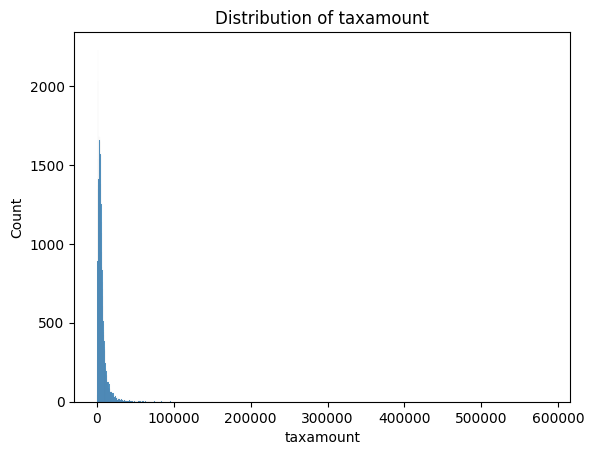

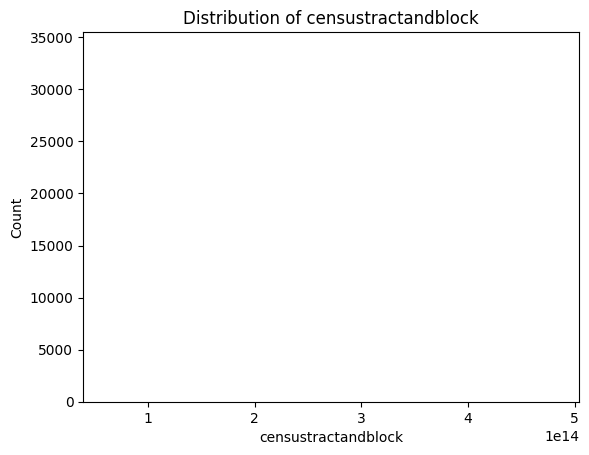

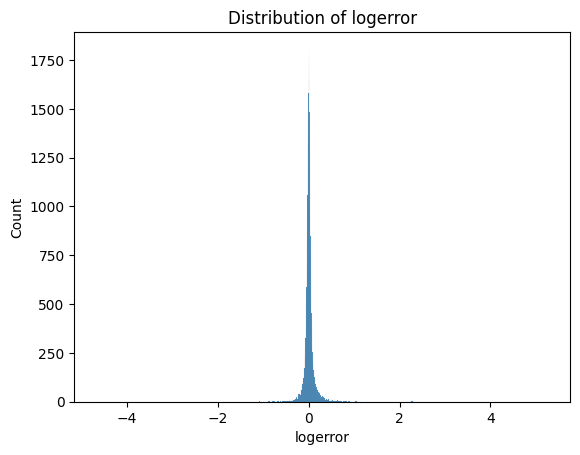

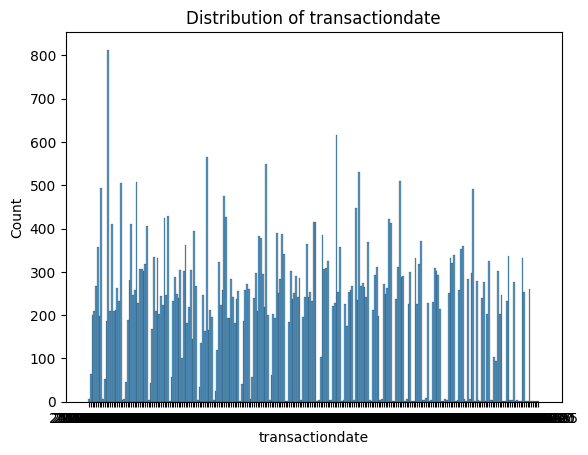

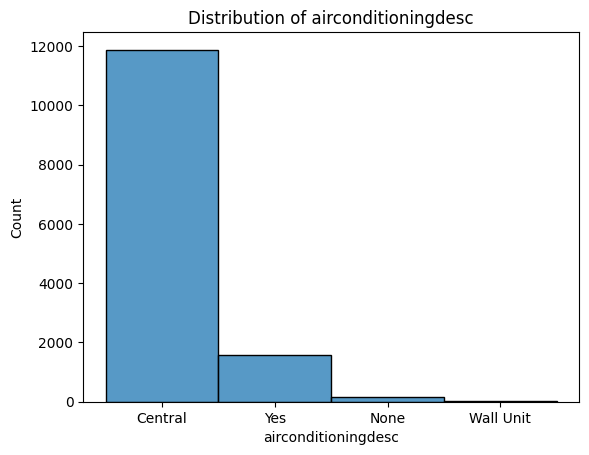

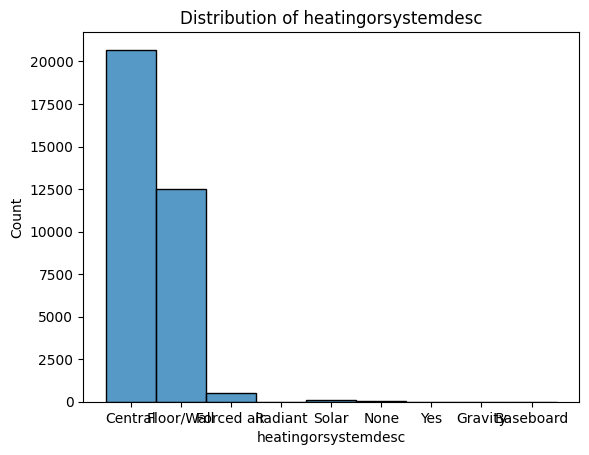

In [9]:
# Univariate distributions
# probability distributions that involves a single random variable.
#probability of observing different values of a single variable 
## itereate through the columnsin df
# craeate histogram of current column
for col in df.columns[:-1]:
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()
   




# Takeaways:
- The number of houses with central heat is not the same as the houses with central air.
- Regionidneighborhood looks like it could be good to bin.
- Lot size seems like it probably has some extreme outliers.
- Buildingquality typeid might also be good for bins.
- year_built seems normal, might be good to create bins out of

If logerror is

In [11]:
train.fips.value_counts()


fips
6037.0    18932
6059.0     7918
6111.0     2520
Name: count, dtype: int64

In [12]:
fips_6037 = train[train.fips == 6037]
fips_6059 = train[train.fips == 6059]
fips_6111 = train[train.fips == 6111]

In [14]:
train.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'bathrooms', 'bedrooms',
       'buildingqualitytypeid', 'calculatedbathnbr', 'area',
       'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt',
       'cars_garage', 'garage_sqft', 'heatingorsystemtypeid', 'latitude',
       'longitude', 'lot_size', 'pools', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'region',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'year_built', 'numberofstories',
       'structuretaxvaluedollarcnt', 'tax_value', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc'],
      dtype='object')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


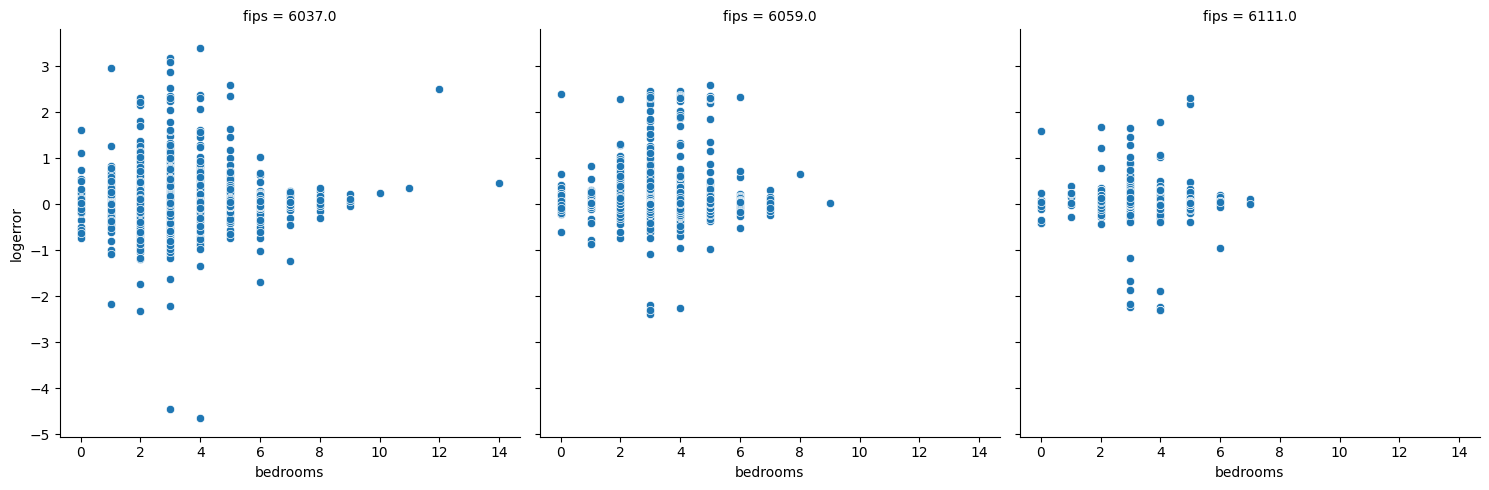

In [15]:
sns.relplot(data=train, x='bedrooms',y='logerror', col='fips')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


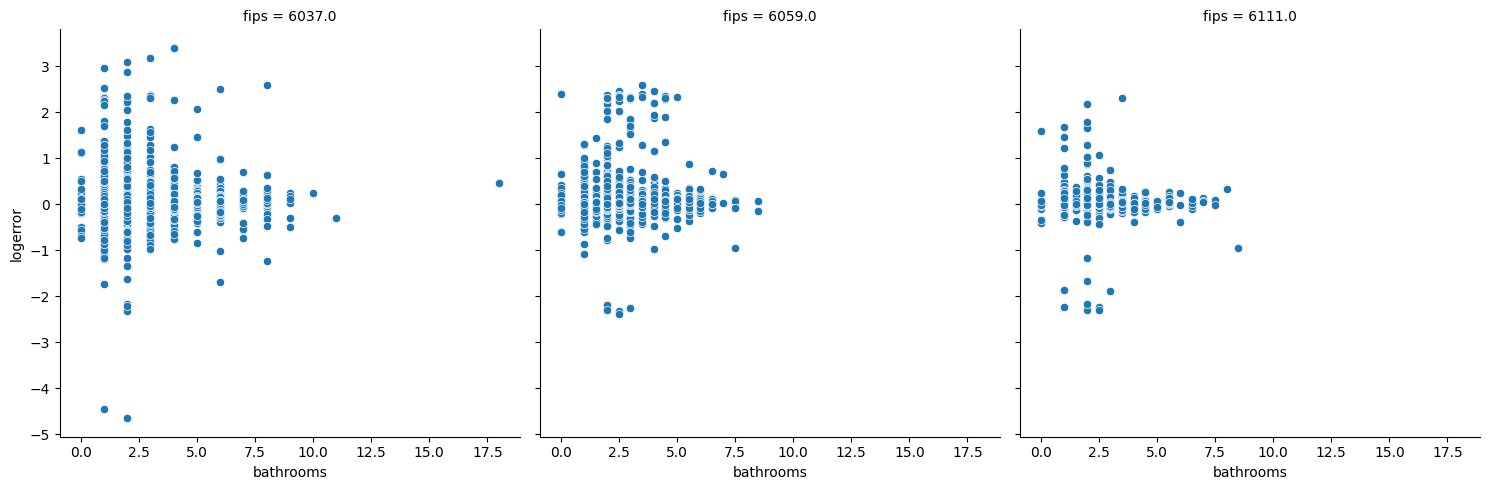

In [16]:
sns.relplot(data=train, x='bathrooms',y='logerror', col='fips')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


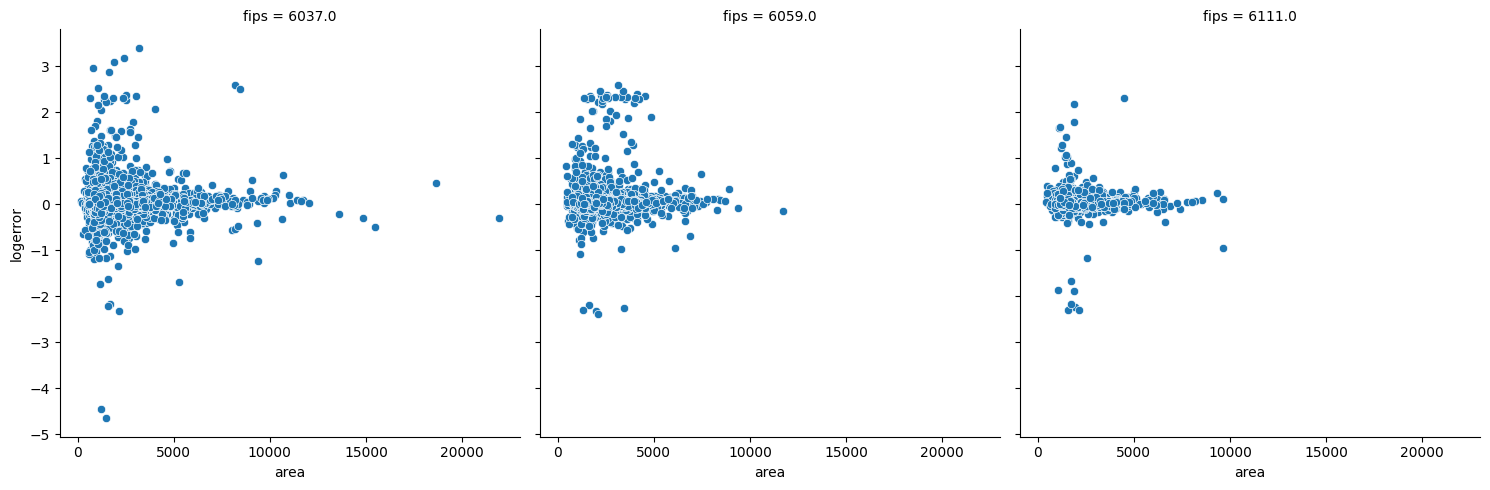

In [17]:
sns.relplot(data=train, x='area',y='logerror', col='fips')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


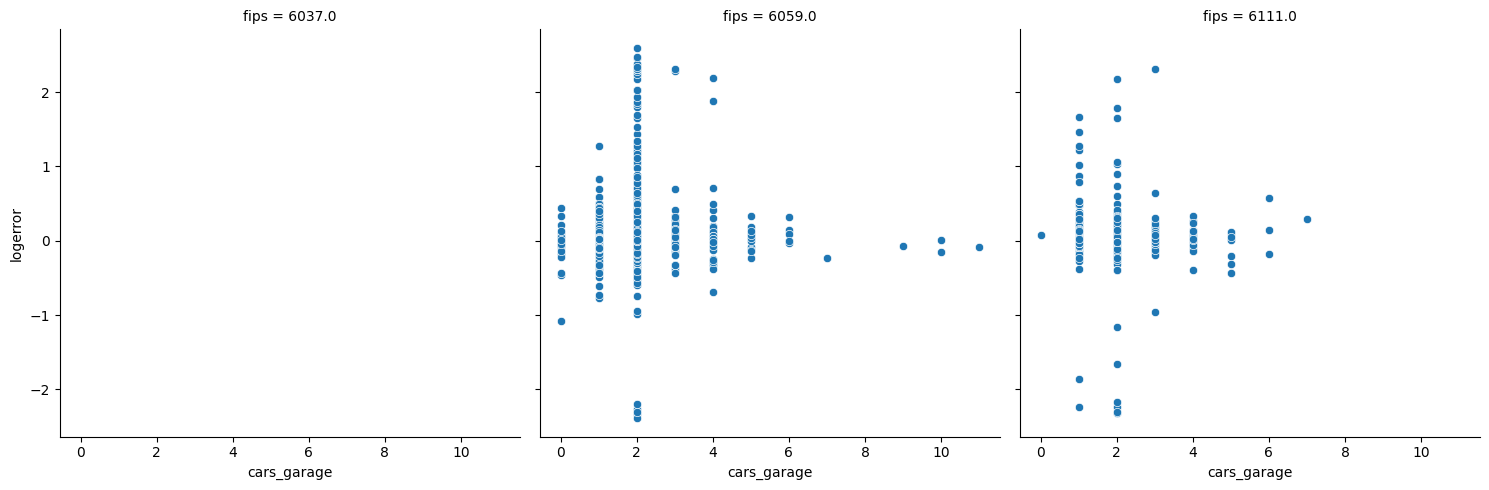

In [18]:
sns.relplot(data=train, x='cars_garage',y='logerror', col='fips')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


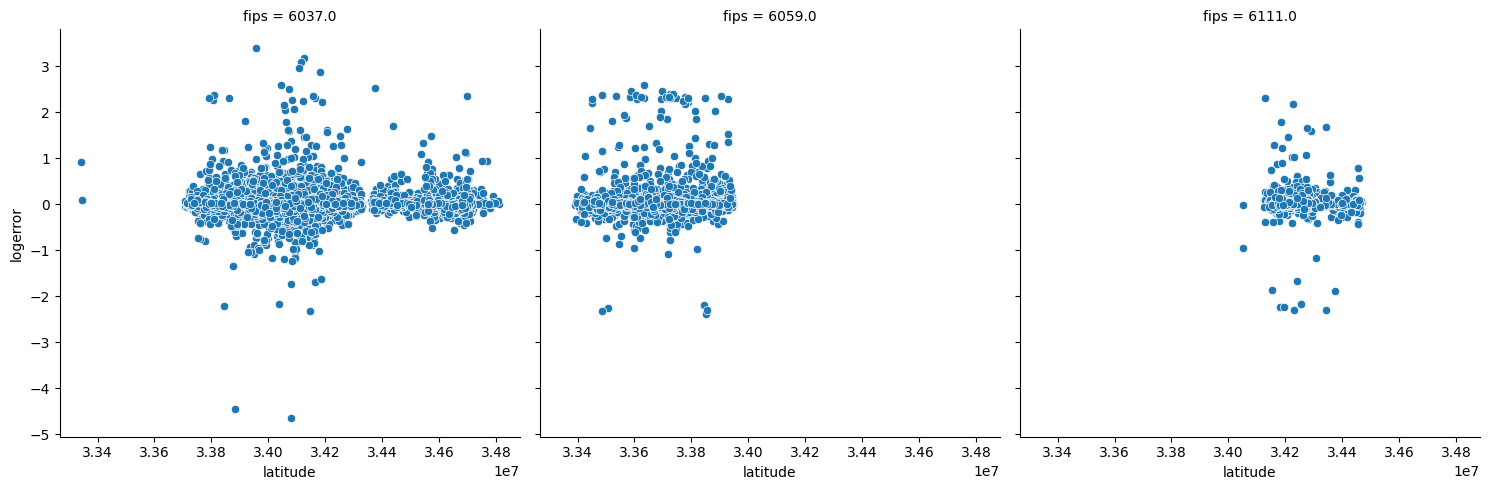

In [19]:
sns.relplot(data=train, x='latitude',y='logerror', col='fips')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


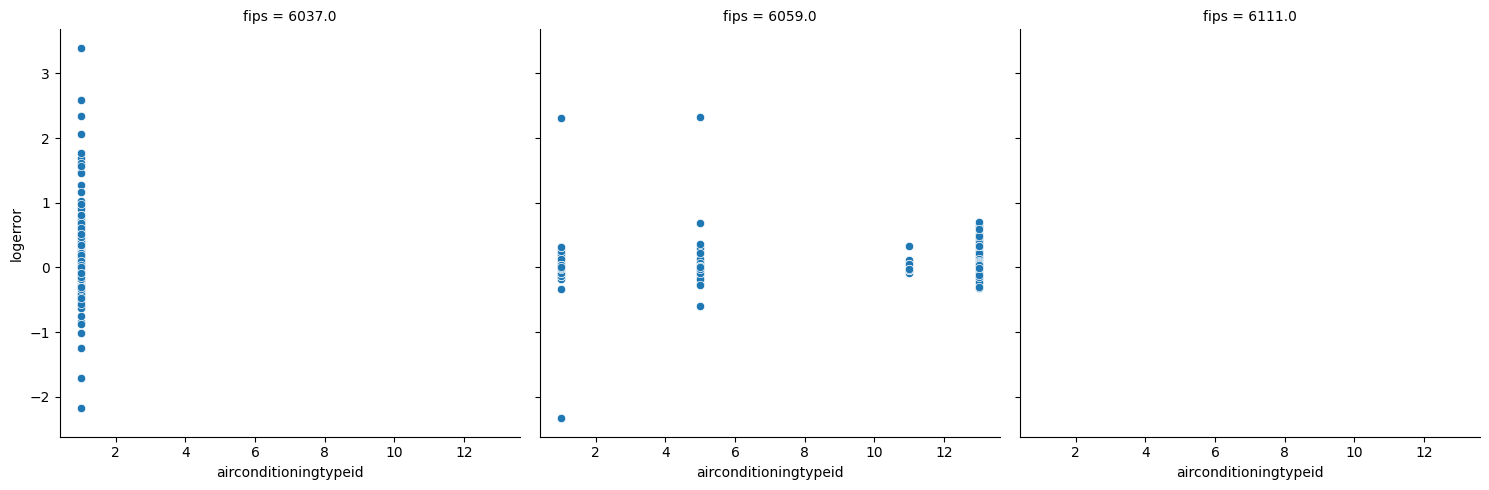

In [20]:
sns.relplot(data=train, x='airconditioningtypeid',y='logerror', col='fips')
